In [9]:
%matplotlib widget
# Load packages and settings
import numpy as np
import pandas as pd
pd.set_option('display.max_rows', 500)
pd.set_option('display.min_rows', 50)
import seaborn as sns



import sys
sys.path.append("./../scripts")
import PandemiXFunctions as pf

import geopandas as gpd

import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (12,8)
plt.rcParams["image.cmap"] = "tab10"
plt.rcParams['axes.prop_cycle'] = plt.cycler(color=plt.cm.tab10.colors)
fs_label = 16
parameters = {
                'axes.labelsize': fs_label,
                'axes.titlesize': fs_label+4,
                'xtick.labelsize': fs_label,
                'ytick.labelsize': fs_label, 
                'legend.fontsize': fs_label, 
                'lines.markersize': 10,
                'lines.linewidth': 3
             }
plt.rcParams.update(parameters)
from matplotlib import cm # Colormaps
import matplotlib.colors as colors
# cmap = plt.cm.get_cmap('Dark2',len(ageGroups))

import locale
import matplotlib.dates as mdates
locale.setlocale(locale.LC_TIME,"Danish")
# ax1.xaxis.set_major_formatter(mdates.DateFormatter('%b\n%Y'))
# ax1.spines['top'].set_visible(False) 

import os
# import csv
import math

from datetime import date


saveFigures = True
# saveFigures = False
print('saveFigures is set to: '+str(saveFigures))

print('Done loading packages')

saveFigures is set to: True
Done loading packages


In [18]:
# Define paths
rootdir_data = os.getcwd() +"/../DanskeData/" 

path_data = rootdir_data + "ssi_data/"
path_dash = rootdir_data + "ssi_dashboard/"
path_vacc = rootdir_data + "ssi_vacc/"

path_figs = os.getcwd() +"/../Figures/" 
path_figs = path_figs + "AdmissionLength/"

In [11]:
# Get case data
latestsubdir = list(os.walk(path_dash))[0][1][-1]
latestdir = path_dash + latestsubdir

df = pd.read_csv(latestdir+'/Regionalt_DB/25_indl_varighed_dag_region.csv',encoding='latin1',delimiter=';')
df2 = pd.read_csv(latestdir+'/Regionalt_DB/26_indl_varighed_uge_region_alder.csv',encoding='latin1',delimiter=';')
df['Dato'] = pd.to_datetime(df['Dato'])


import datetime
df2['Dato'] = np.array([np.datetime64(datetime.datetime.strptime(x + '-1', "%Y-W%W-%w")) for x in df2.Uge])

In [13]:
display(df.tail())
display(df2.tail())


,Dato,Region,Længde af indlæggelse,Antal borgere
5210,2022-03-07,Nordjylland,Lang,7
5211,2022-03-07,Sjælland,Kort,17
5212,2022-03-07,Sjælland,Lang,33
5213,2022-03-07,Syddanmark,Kort,5
5214,2022-03-07,Syddanmark,Lang,45


,Uge,Region,Aldersgruppe,Længde af indlæggelse,Antal borgere,Dato
4362,2022-W09,Syddanmark,40-64,Kort,9,2022-02-28
4363,2022-W09,Syddanmark,65-79,Lang,142,2022-02-28
4364,2022-W09,Syddanmark,65-79,Kort,8,2022-02-28
4365,2022-W09,Syddanmark,80+,Lang,121,2022-02-28
4366,2022-W09,Syddanmark,80+,Kort,3,2022-02-28


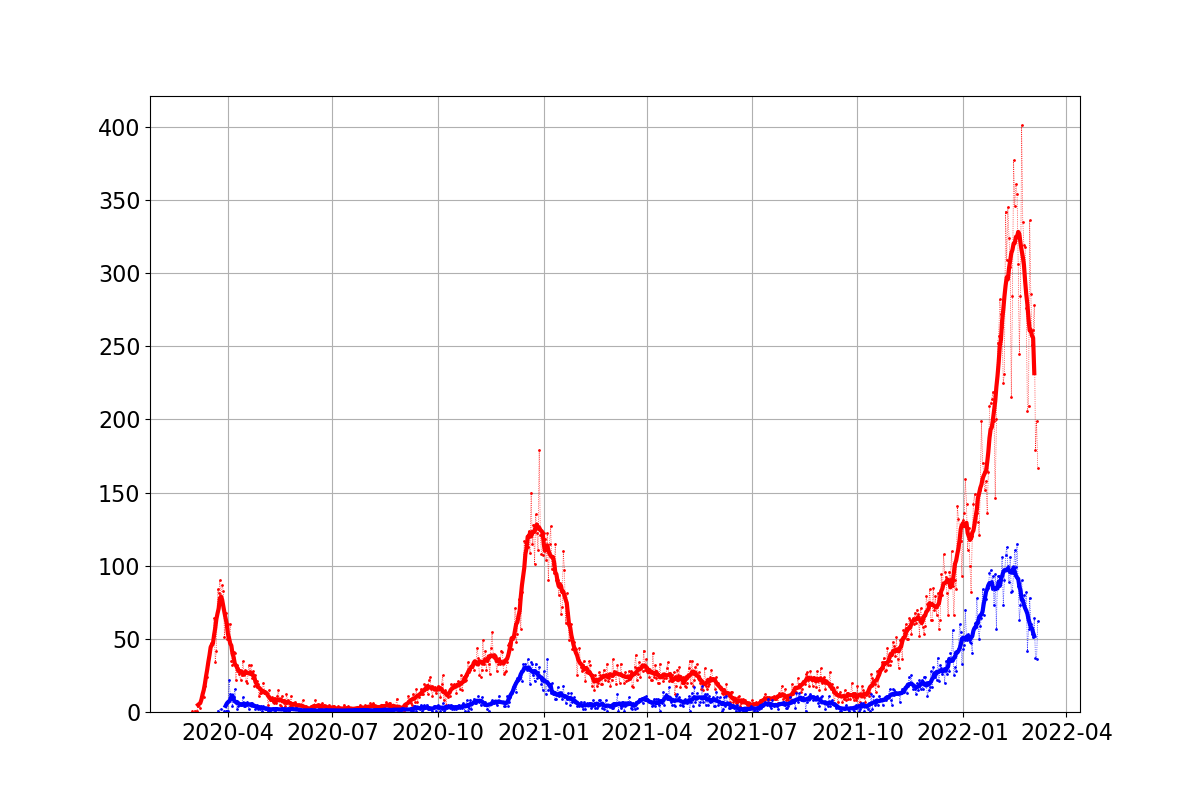

In [19]:

allLong = df[df['Længde af indlæggelse'] == 'Lang'].groupby('Dato').sum()
allShort = df[df['Længde af indlæggelse'] == 'Kort'].groupby('Dato').sum()

fig,ax1 = plt.subplots()
 
ax1.plot(allLong.index,allLong['Antal borgere'],'r.:',markersize=2,linewidth=0.5)
ax1.plot(pf.rnTime(allLong.index),pf.rnMean(allLong['Antal borgere']),color='r')
ax1.plot(allShort.index,allShort['Antal borgere'],'b.:',markersize=2,linewidth=0.5)
ax1.plot(pf.rnTime(allShort.index),pf.rnMean(allShort['Antal borgere']),color='b')

ax1.set_ylim(bottom=0)

ax1.grid() 

if saveFigures:
    fig.savefig(path_figs+'AdmissionOverview')


In [15]:
# df2
allShort 
dfAll = pd.merge(allLong,allShort,on='Dato',how='outer',suffixes=['Long','Short'])
dfAll = dfAll.sort_values(by='Dato')
dfAll['Antal borgereLong'] = dfAll['Antal borgereLong'].fillna(0)
dfAll['Antal borgereShort'] = dfAll['Antal borgereShort'].fillna(0)

dfAll = dfAll.rename(columns={'Antal borgereLong':'Lang','Antal borgereShort':'Kort'})

dfAll.index = pd.to_datetime(dfAll.index)
dfAll.tail()


,Lang,Kort
Dato,,
2022-03-03,261.0,51.0
2022-03-04,278.0,64.0
2022-03-05,179.0,37.0
2022-03-06,199.0,36.0
2022-03-07,167.0,62.0


(0.0, 1.0)

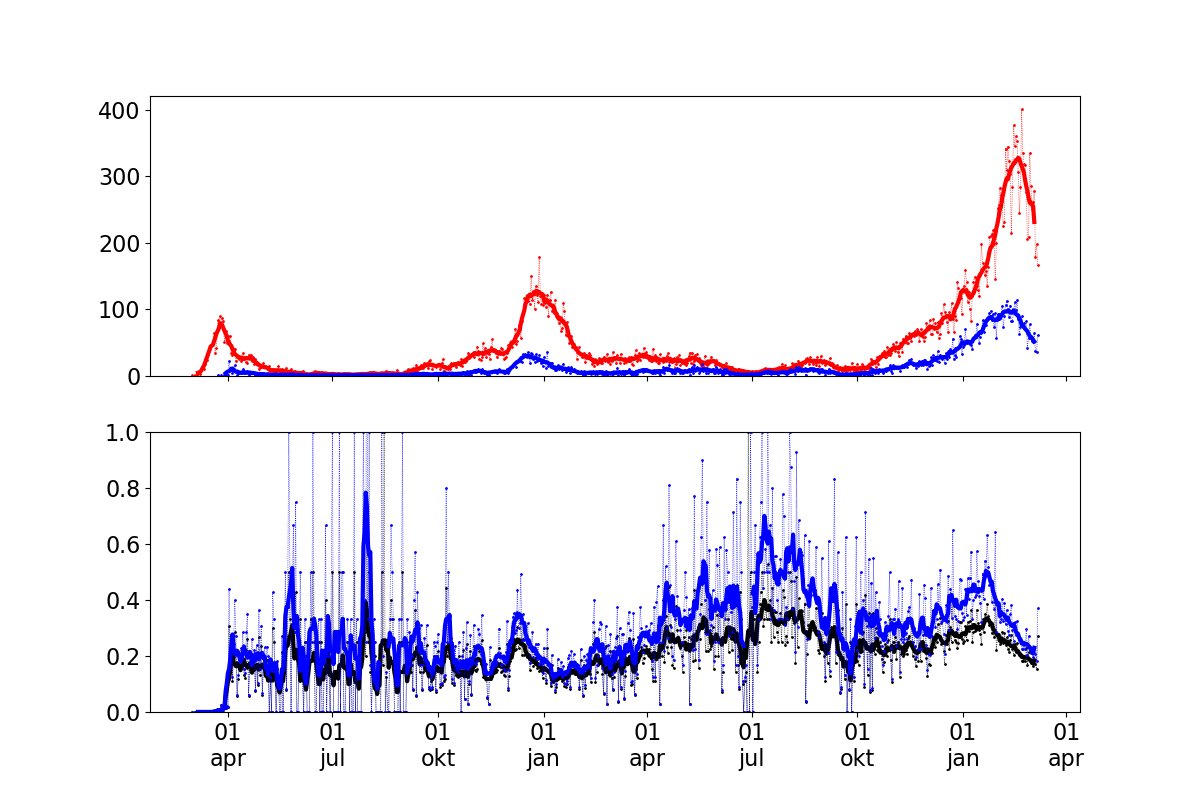

In [20]:

fig,(ax1,ax2) = plt.subplots(2,1,sharex=True)

 
ax1.plot(allLong.index,allLong['Antal borgere'],'r.:',markersize=2,linewidth=0.5)
ax1.plot(pf.rnTime(allLong.index),pf.rnMean(allLong['Antal borgere']),color='r')
ax1.plot(allShort.index,allShort['Antal borgere'],'b.:',markersize=2,linewidth=0.5)
ax1.plot(pf.rnTime(allShort.index),pf.rnMean(allShort['Antal borgere']),color='b')

ax1.set_ylim(bottom=0)

curRatio = dfAll.Kort/(dfAll.Lang + dfAll.Kort)
pf.plotMean(dfAll.index,curRatio,ax2,color='k')
curRatio = dfAll.Kort/(dfAll.Lang)
pf.plotMean(dfAll.index,curRatio,ax2,color='b')
# ax2.plot(dfAll.index,curRatio)

ax2.xaxis.set_major_formatter(mdates.DateFormatter('%d\n%b'))

ax2.set_ylim([0,1])

# Aldersfordelt

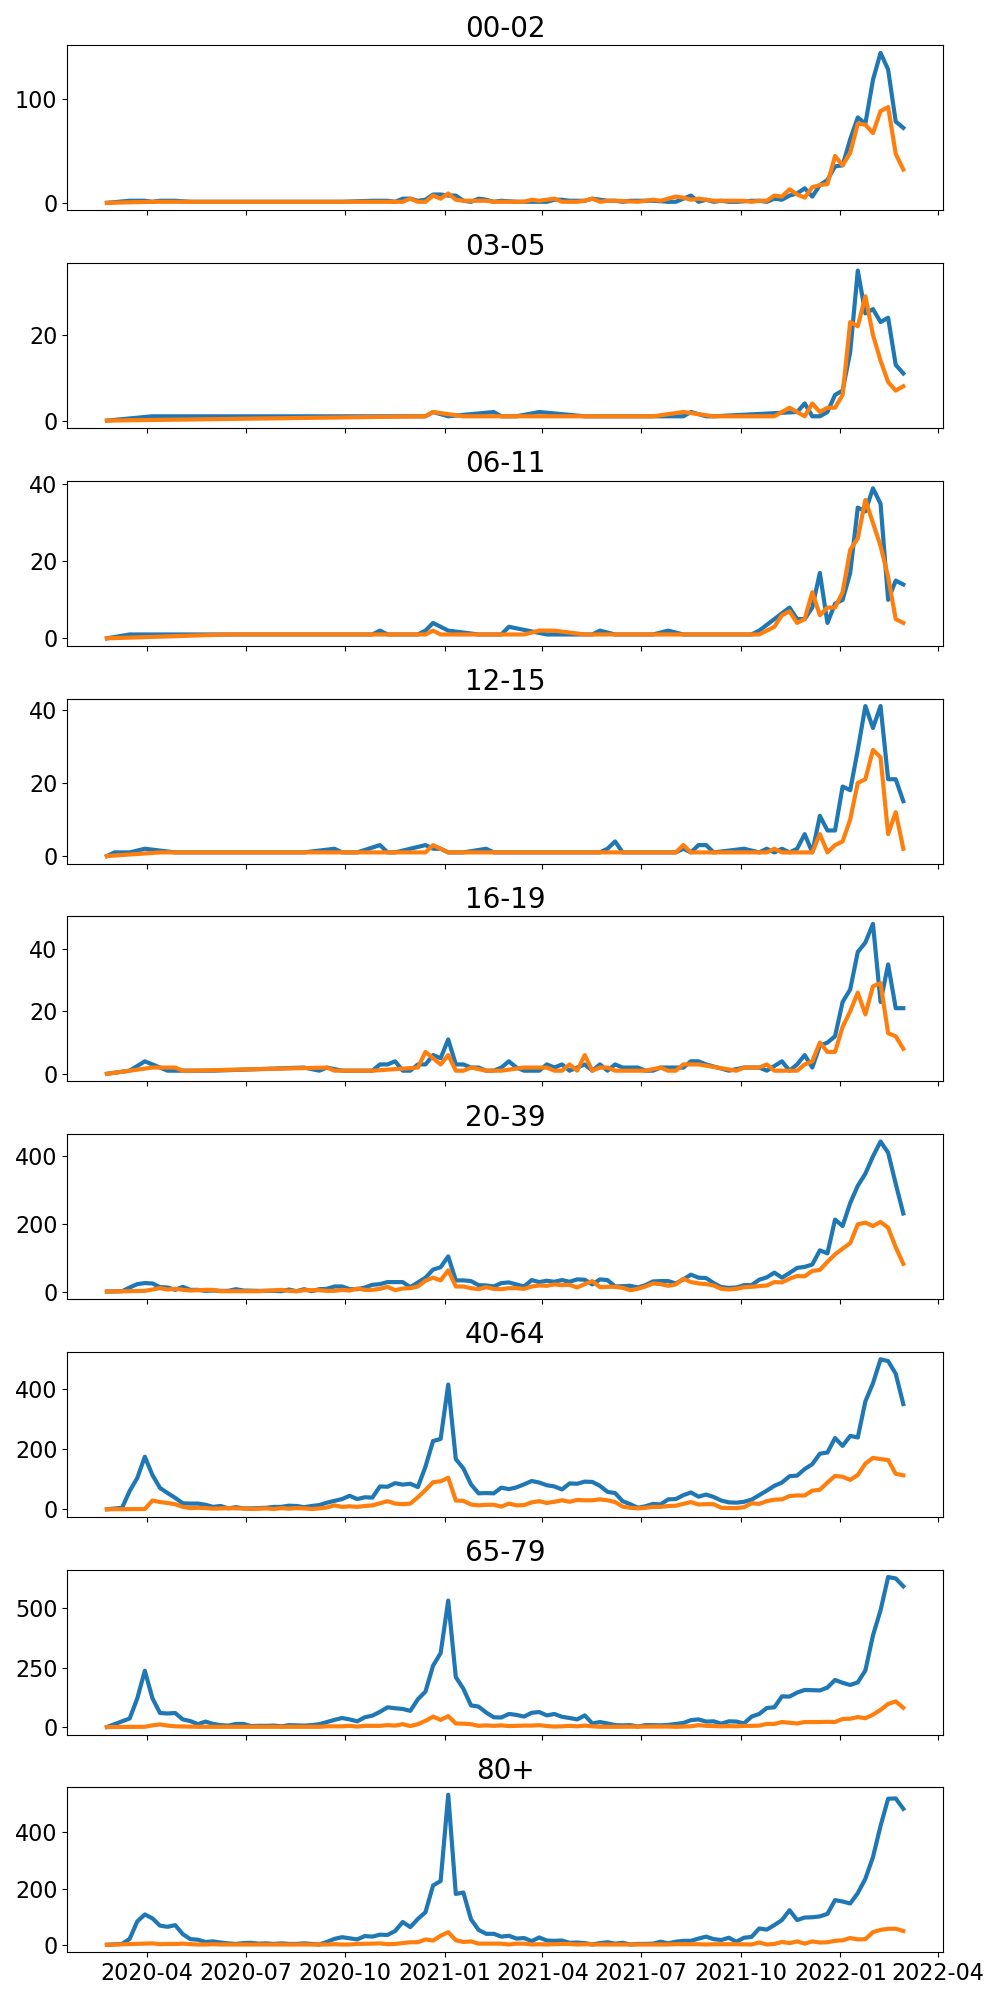

In [35]:
allAges = df2.Aldersgruppe.unique()
numAge = len(allAges)
# fig,allAxes = plt.subplots(numAge,1,sharex=True,sharey=True,figsize=(10,20))
fig,allAxes = plt.subplots(numAge,1,sharex=True,figsize=(10,20))

for i,curAge in enumerate(allAges): 

    ax=allAxes.flatten()[i]
    
    agedf = df2[df2.Aldersgruppe == curAge]
    curLong = agedf[agedf['Længde af indlæggelse'] == 'Lang'].groupby('Dato').sum()
    curShort = agedf[agedf['Længde af indlæggelse'] == 'Kort'].groupby('Dato').sum()

    ax.plot(curLong.index,curLong['Antal borgere'])
    ax.plot(curShort.index,curShort['Antal borgere'])

    # dfAll = pd.merge(curLong,curShort,on='Dato',how='outer',suffixes=['Long','Short'])
    # dfAll = dfAll.sort_values(by='Dato')
    # dfAll['Antal borgereLong'] = dfAll['Antal borgereLong'].fillna(0)
    # dfAll['Antal borgereShort'] = dfAll['Antal borgereShort'].fillna(0)

    # dfAll = dfAll.rename(columns={'Antal borgereLong':'Lang','Antal borgereShort':'Kort'})

    # dfAll.index = pd.to_datetime(dfAll.index)
    
    # curRatio = dfAll.Kort/(dfAll.Lang + dfAll.Kort)
    # pf.plotMean(dfAll.index,curRatio,ax,color='k')
    # # curRatio = dfAll.Kort/(dfAll.Lang)
    # # pf.plotMean(dfAll.index,curRatio,ax2,color='b')


    ax.set_title(curAge)

fig.tight_layout() 

# Stacked

In [113]:
# Short admissions
dfShort = df2[df2['Længde af indlæggelse'] == 'Kort']
# dfShort = df2[df2['Længde af indlæggelse'] == 'Kort'].groupby(['Dato','Aldersgruppe'],dropna=False).sum()
# dfShort
# dfShort.groupby(['Dato','Aldersgruppe'],dropna=False).count().unstack().fillna(0)
# dfShort.pivot_table('Dato','Aldersgruppe',values='Antal borgere',fill_value=0,aggfunc='count')
# pd.pivot_table(dfShort,values='Antal borgere',index=['Dato','Aldersgruppe'],fill_value=0,dropna=False,aggfunc=np.sum)

dfColl = pd.crosstab(dfShort.Dato,dfShort['Aldersgruppe'],dfShort['Antal borgere'],aggfunc="sum").fillna(0)

dfColl['Total'] = dfColl.sum(axis=1)
dfColl['03-19'] = dfColl['03-05']+ dfColl['06-11'] + dfColl['12-15'] + dfColl['16-19']

dfColl = dfColl.iloc[1:] # Since first date has zero in all columns (?!)

dfColl.tail()

# plt.figure()
# plt.plot(dfColl.index,dfColl['00-02'])
# plt.plot(dfColl.index,dfColl['80+'])

Aldersgruppe,00-02,03-05,06-11,12-15,16-19,20-39,40-64,65-79,80+,Total,03-19
Dato,,,,,,,,,,,
2022-01-31,67.0,20.0,30.0,29.0,28.0,194.0,171.0,52.0,45.0,636.0,107.0
2022-02-07,88.0,14.0,24.0,27.0,29.0,206.0,167.0,72.0,53.0,680.0,94.0
2022-02-14,92.0,9.0,16.0,6.0,13.0,189.0,164.0,97.0,57.0,643.0,44.0
2022-02-21,47.0,7.0,5.0,12.0,12.0,131.0,118.0,108.0,57.0,497.0,36.0
2022-02-28,32.0,8.0,4.0,2.0,8.0,82.0,113.0,81.0,49.0,379.0,22.0


In [114]:
firstDate = dfColl.index.values[0]
lastDate = dfColl.index.values[-1]

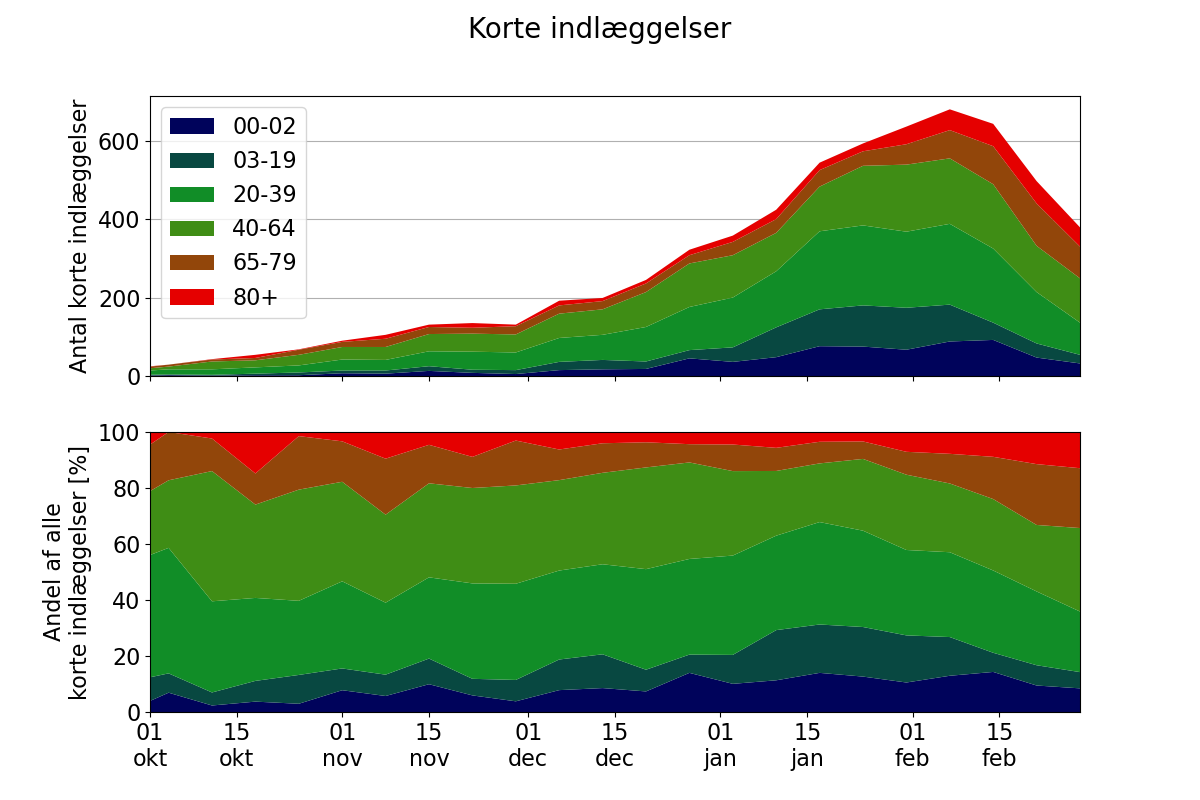

In [133]:
fig,(ax1,ax2) = plt.subplots(2,1,sharex=True) 

allNames = ['00-02','03-19','20-39','40-64','65-79','80+']
cmap = pf.getColormapFromList(['xkcd:dark blue','xkcd:green','xkcd:red'],N=len(allNames))
allColors = [cmap(x) for x in range(len(allNames))]

ax1.stackplot(
    dfColl.index,
    dfColl['00-02'],
    dfColl['03-19'],
    dfColl['20-39'],
    dfColl['40-64'],
    dfColl['65-79'],
    dfColl['80+'],
    labels=allNames,
    colors= allColors
)

ax2.stackplot(
    dfColl.index,
    100*dfColl['00-02']/dfColl.Total,
    100*dfColl['03-19']/dfColl.Total,
    100*dfColl['20-39']/dfColl.Total,
    100*dfColl['40-64']/dfColl.Total,
    100*dfColl['65-79']/dfColl.Total,
    100*dfColl['80+']/dfColl.Total,
    labels=allNames,
    colors= allColors
)

ax1.legend(loc='upper left')
# ax2.legend(loc='upper left')

ax1.set_ylabel('Antal korte indlæggelser')
ax2.set_ylabel('Andel af alle\nkorte indlæggelser [%]')


ax1.set_xlim([firstDate,lastDate])
ax2.set_ylim([0,100])

ax1.grid(axis='y')
ax1.set_axisbelow(True)

fig.suptitle('Korte indlæggelser',fontsize=20)

ax1.xaxis.set_major_formatter(mdates.DateFormatter('%b\n%Y'))

if saveFigures:
    fig.savefig(path_figs+'AgeDivisionShort')

    
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%d\n%b'))
ax1.set_xlim(left=np.datetime64('2021-10-01'))

if saveFigures:
    fig.savefig(path_figs+'AgeDivisionShortZoom')

In [132]:
# Lange indlæggelser
dfLong = df2[df2['Længde af indlæggelse'] == 'Lang']

dfCollLong = pd.crosstab(dfLong.Dato,dfLong['Aldersgruppe'],dfLong['Antal borgere'],aggfunc="sum").fillna(0)

dfCollLong['Total'] = dfCollLong.sum(axis=1)
dfCollLong['03-19'] = dfCollLong['03-05']+ dfCollLong['06-11'] + dfCollLong['12-15'] + dfCollLong['16-19']

dfCollLong = dfCollLong.iloc[1:] # Since first date has zero in all columns (?!)

# dfCollLong.tail()


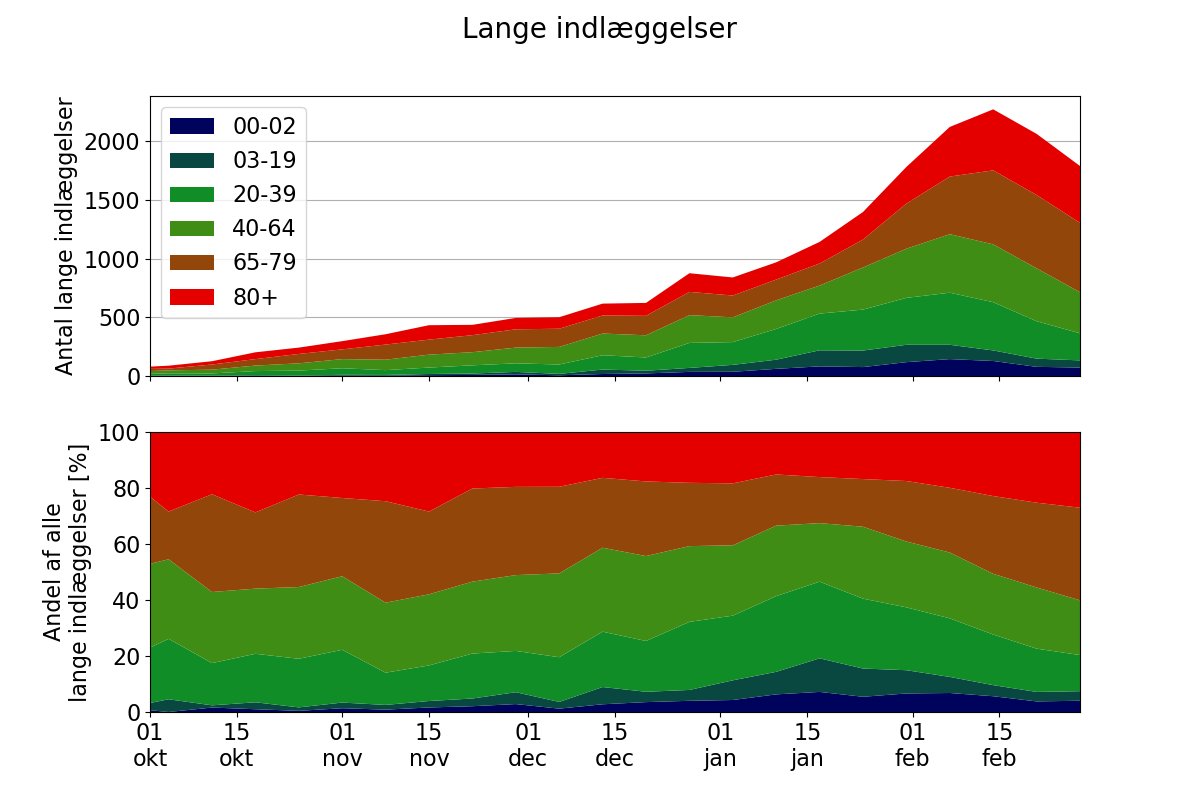

In [134]:
fig,(ax1,ax2) = plt.subplots(2,1,sharex=True) 

allNames = ['00-02','03-19','20-39','40-64','65-79','80+']
cmap = pf.getColormapFromList(['xkcd:dark blue','xkcd:green','xkcd:red'],N=len(allNames))
allColors = [cmap(x) for x in range(len(allNames))]

ax1.stackplot(
    dfCollLong.index,
    dfCollLong['00-02'],
    dfCollLong['03-19'],
    dfCollLong['20-39'],
    dfCollLong['40-64'],
    dfCollLong['65-79'],
    dfCollLong['80+'],
    labels=allNames,
    colors= allColors
)

ax2.stackplot(
    dfCollLong.index,
    100*dfCollLong['00-02']/dfCollLong.Total,
    100*dfCollLong['03-19']/dfCollLong.Total,
    100*dfCollLong['20-39']/dfCollLong.Total,
    100*dfCollLong['40-64']/dfCollLong.Total,
    100*dfCollLong['65-79']/dfCollLong.Total,
    100*dfCollLong['80+']/dfCollLong.Total,
    labels=allNames,
    colors= allColors
)

ax1.legend(loc='upper left')
# ax2.legend(loc='upper left')

ax1.set_ylabel('Antal lange indlæggelser')
ax2.set_ylabel('Andel af alle\nlange indlæggelser [%]')


ax1.set_xlim([firstDate,lastDate])
ax2.set_ylim([0,100])

ax1.grid(axis='y')
ax1.set_axisbelow(True)

ax1.xaxis.set_major_formatter(mdates.DateFormatter('%b\n%Y'))
fig.suptitle('Lange indlæggelser',fontsize=20)

if saveFigures:
    fig.savefig(path_figs+'AgeDivisionLong')

ax1.xaxis.set_major_formatter(mdates.DateFormatter('%d\n%b'))
ax1.set_xlim(left=np.datetime64('2021-10-01'))

if saveFigures:
    fig.savefig(path_figs+'AgeDivisionLongZoom')

# Regional

In [149]:
# Lange indlæggelser
dfShort = df2[df2['Længde af indlæggelse'] == 'Lang']

dfRegiLong = pd.crosstab(dfLong.Dato,dfLong['Region'],dfLong['Antal borgere'],aggfunc="sum").fillna(0)

dfRegiLong['Total'] = dfRegiLong.sum(axis=1)
dfRegiLong = dfRegiLong.iloc[1:] # Since first date has zero in all columns (?!)

dfRegiLong.tail()

# Korte indlæggelser
dfShort = df2[df2['Længde af indlæggelse'] == 'Lang']

dfRegiShort = pd.crosstab(dfShort.Dato,dfShort['Region'],dfShort['Antal borgere'],aggfunc="sum").fillna(0)

dfRegiShort['Total'] = dfRegiShort.sum(axis=1)
dfRegiShort = dfRegiShort.iloc[1:] # Since first date has zero in all columns (?!)

dfRegiShort.tail()

Region,Hovedstaden,Midtjylland,Nordjylland,Sjælland,Syddanmark,Total
Dato,,,,,,
2022-01-31,582.0,323.0,165.0,307.0,385.0,1762.0
2022-02-07,610.0,470.0,221.0,313.0,500.0,2114.0
2022-02-14,601.0,479.0,302.0,327.0,543.0,2252.0
2022-02-21,499.0,441.0,299.0,305.0,509.0,2053.0
2022-02-28,461.0,379.0,252.0,265.0,423.0,1780.0


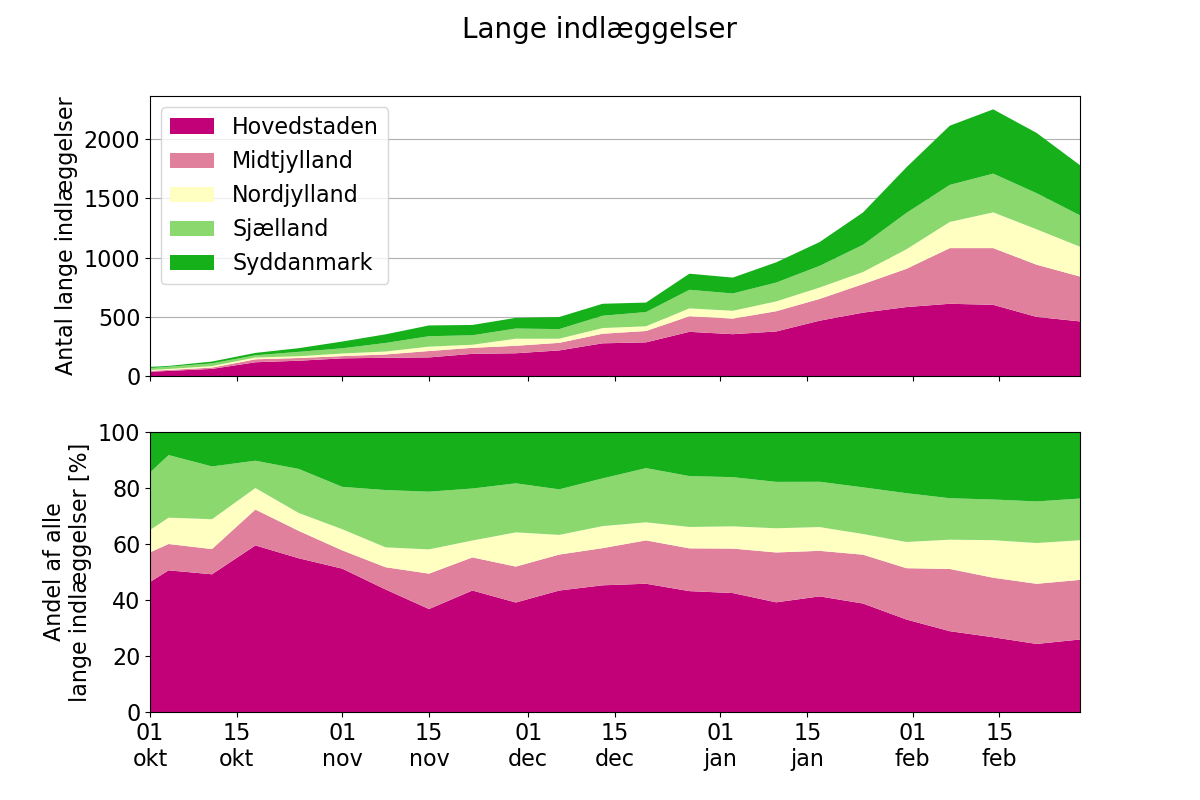

In [148]:
fig,(ax1,ax2) = plt.subplots(2,1,sharex=True) 

allNames = ['00-02','03-19','20-39','40-64','65-79','80+']
allNames = dfLong.Region.unique()
cmap = pf.getColormapFromList(['xkcd:magenta','xkcd:cream','xkcd:green'],N=len(allNames)-1)
allColors = [cmap(x) for x in range(len(allNames))]

ax1.stackplot(
    dfRegiLong.index,
    dfRegiLong[allNames[0]],
    dfRegiLong[allNames[1]],
    dfRegiLong[allNames[2]],
    dfRegiLong[allNames[3]],
    dfRegiLong[allNames[4]],
    labels=allNames,
    colors= allColors
)

ax2.stackplot(
    dfRegiLong.index,
    100* dfRegiLong[allNames[0]]/dfRegiLong['Total'],
    100* dfRegiLong[allNames[1]]/dfRegiLong['Total'],
    100* dfRegiLong[allNames[2]]/dfRegiLong['Total'],
    100* dfRegiLong[allNames[3]]/dfRegiLong['Total'],
    100* dfRegiLong[allNames[4]]/dfRegiLong['Total'],
    labels=allNames,
    colors= allColors
)

ax1.legend(loc='upper left')
# ax2.legend(loc='upper left')

ax1.set_ylabel('Antal lange indlæggelser')
ax2.set_ylabel('Andel af alle\nlange indlæggelser [%]')


ax1.set_xlim([firstDate,lastDate])
ax2.set_ylim([0,100])

ax1.grid(axis='y')
ax1.set_axisbelow(True)

ax1.xaxis.set_major_formatter(mdates.DateFormatter('%b\n%Y'))
fig.suptitle('Lange indlæggelser',fontsize=20)

if saveFigures:
    fig.savefig(path_figs+'RegionalDivisionLong')

ax1.xaxis.set_major_formatter(mdates.DateFormatter('%d\n%b'))
ax1.set_xlim(left=np.datetime64('2021-10-01'))

if saveFigures:
    fig.savefig(path_figs+'RegionalDivisionLongZoom')

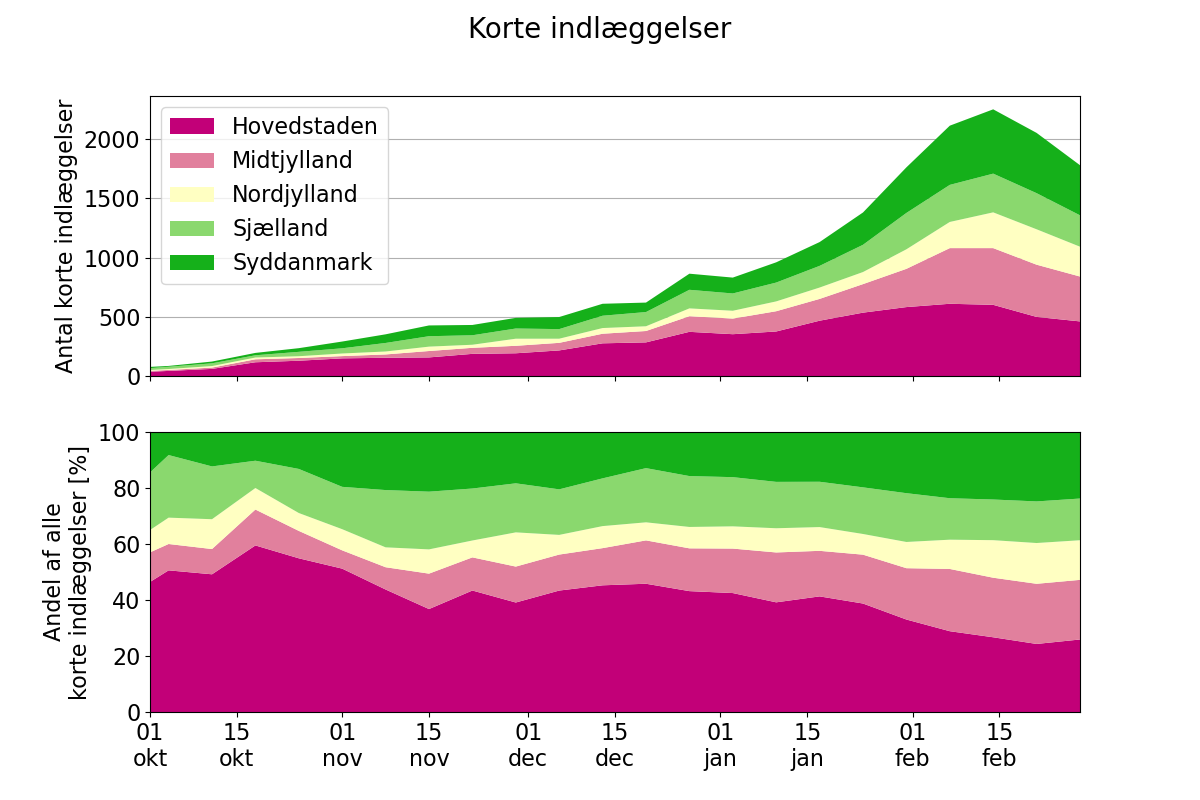

In [150]:
fig,(ax1,ax2) = plt.subplots(2,1,sharex=True) 

allNames = ['00-02','03-19','20-39','40-64','65-79','80+']
allNames = dfShort.Region.unique()
cmap = pf.getColormapFromList(['xkcd:magenta','xkcd:cream','xkcd:green'],N=len(allNames)-1)
allColors = [cmap(x) for x in range(len(allNames))]

ax1.stackplot(
    dfRegiShort.index,
    dfRegiShort[allNames[0]],
    dfRegiShort[allNames[1]],
    dfRegiShort[allNames[2]],
    dfRegiShort[allNames[3]],
    dfRegiShort[allNames[4]],
    labels=allNames,
    colors= allColors
)

ax2.stackplot(
    dfRegiShort.index,
    100* dfRegiShort[allNames[0]]/dfRegiShort['Total'],
    100* dfRegiShort[allNames[1]]/dfRegiShort['Total'],
    100* dfRegiShort[allNames[2]]/dfRegiShort['Total'],
    100* dfRegiShort[allNames[3]]/dfRegiShort['Total'],
    100* dfRegiShort[allNames[4]]/dfRegiShort['Total'],
    labels=allNames,
    colors= allColors
)

ax1.legend(loc='upper left')
# ax2.legend(loc='upper left')

ax1.set_ylabel('Antal korte indlæggelser')
ax2.set_ylabel('Andel af alle\nkorte indlæggelser [%]')


ax1.set_xlim([firstDate,lastDate])
ax2.set_ylim([0,100])

ax1.grid(axis='y')
ax1.set_axisbelow(True)

ax1.xaxis.set_major_formatter(mdates.DateFormatter('%b\n%Y'))
fig.suptitle('Korte indlæggelser',fontsize=20)

if saveFigures:
    fig.savefig(path_figs+'RegionalDivisionShort')

ax1.xaxis.set_major_formatter(mdates.DateFormatter('%d\n%b'))
ax1.set_xlim(left=np.datetime64('2021-10-01'))

if saveFigures:
    fig.savefig(path_figs+'RegionalDivisionShortZoom')